# **1. Perkenalan Dataset**


## **1.1 Sumber Dataset**

Dataset diambil dari repositori publik **Kaggle**: *Heart Failure Prediction* (oleh fedesoriano). Tautan dan detail kurasi tersedia pada deskripsi dataset. 

URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## **1.2 Deskripsi Singkat**

Dataset tabular untuk **prediksi penyakit jantung** (supervised binary classification). Terdiri dari **918 observasi** dan **11 fitur** klinis/demografis, dikompilasi dari lima dataset jantung (UCI: Cleveland, Hungarian, Switzerland, Long Beach VA, Stalog) kemudian dideduplicasi. Target: **`HeartDisease`** (1 = penyakit jantung, 0 = normal). 

## **1.3 Atribut**

* **Age** (tahun); **Sex** (M/F); **ChestPainType** (TA/ATA/NAP/ASY).
* **RestingBP** (mmHg); **Cholesterol** (mg/dL); **FastingBS** (1 jika >120 mg/dL, else 0).
* **RestingECG** (Normal/ST/LVH); **MaxHR** (60–202 bpm); **ExerciseAngina** (Y/N).
* **Oldpeak** (ST—depresi/kenaikan relatif istirahat); **ST_Slope** (Up/Flat/Down).
* **HeartDisease** (label). 

## **1.4 Sitasi**

fedesoriano. (September 2021). *Heart Failure Prediction Dataset*. Diakses dari Kaggle https://www.kaggle.com/fedesoriano/heart-failure-prediction.

# **2. Import Library**

In [61]:
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    classification_report,
    roc_auc_score,
    roc_curve
)

# Feature Selection & Engineering
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Handling Imbalanced Data (opsional)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Utilities
import warnings
import os
import sys

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Semua library berhasil diimpor!")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Semua library berhasil diimpor!
Python version: 3.12.7 | packaged by conda-forge | (main, Oct  4 2024, 16:05:46) [GCC 13.3.0]
Pandas version: 2.3.3
NumPy version: 2.3.4


# **3. Memuat Dataset**

In [62]:
# Memuat dataset
dataset_path = '../heart_raw.csv'

# Load dataset dengan error handling
try:
    # Cek apakah file ada
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"File tidak ditemukan: {dataset_path}")
    
    # Load dataset
    df = pd.read_csv(dataset_path)
    
    # Validasi dataset tidak kosong
    if df.empty:
        raise ValueError("Dataset kosong! Tidak ada data yang dimuat.")

    print("✓ Dataset berhasil dimuat!")
    print(f"Jumlah baris dan kolom: {df.shape}")
    
except FileNotFoundError as e:
    print(f"❌ ERROR: {e}")
    print(f"Pastikan file {dataset_path} ada di lokasi yang benar.")
    df = None
    
except pd.errors.EmptyDataError:
    print("❌ ERROR: File CSV kosong atau tidak memiliki data.")
    df = None
    
except pd.errors.ParserError as e:
    print(f"❌ ERROR: Gagal mem-parsing file CSV.")
    print(f"Detail: {e}")
    df = None
    
except Exception as e:
    print(f"❌ ERROR: Terjadi kesalahan tidak terduga.")
    print(f"Detail: {e}")
    df = None

✓ Dataset berhasil dimuat!
Jumlah baris dan kolom: (918, 12)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

EXPLORATORY DATA ANALYSIS (EDA)

1. INFORMASI DASAR DATASET
Dimensi dataset: 918 baris x 12 kolom

Kolom-kolom dalam dataset:
  1. Age (int64)
  2. Sex (object)
  3. ChestPainType (object)
  4. RestingBP (int64)
  5. Cholesterol (int64)
  6. FastingBS (int64)
  7. RestingECG (object)
  8. MaxHR (int64)
  9. ExerciseAngina (object)
  10. Oldpeak (float64)
  11. ST_Slope (object)
  12. HeartDisease (int64)

--------------------------------------------------------------------------------
Detail Tipe Data:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null   

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Statistik untuk Fitur Kategorikal:

Sex:
Sex
M    725
F    193
Name: count, dtype: int64
  Unique values: 2

ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
  Unique values: 4

RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
  Unique values: 3

ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
  Unique values: 2

ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
  Unique values: 3

5. DISTRIBUSI TARGET VARIABLE (HeartDisease)
HeartDisease
1    508
0    410
Name: count, dtype: int64

Persentase:
  Normal (0): 44.66%
  Heart Disease (1): 55.34%

Imbalance Ratio: 1.24
✓ Dataset relatif balanced.


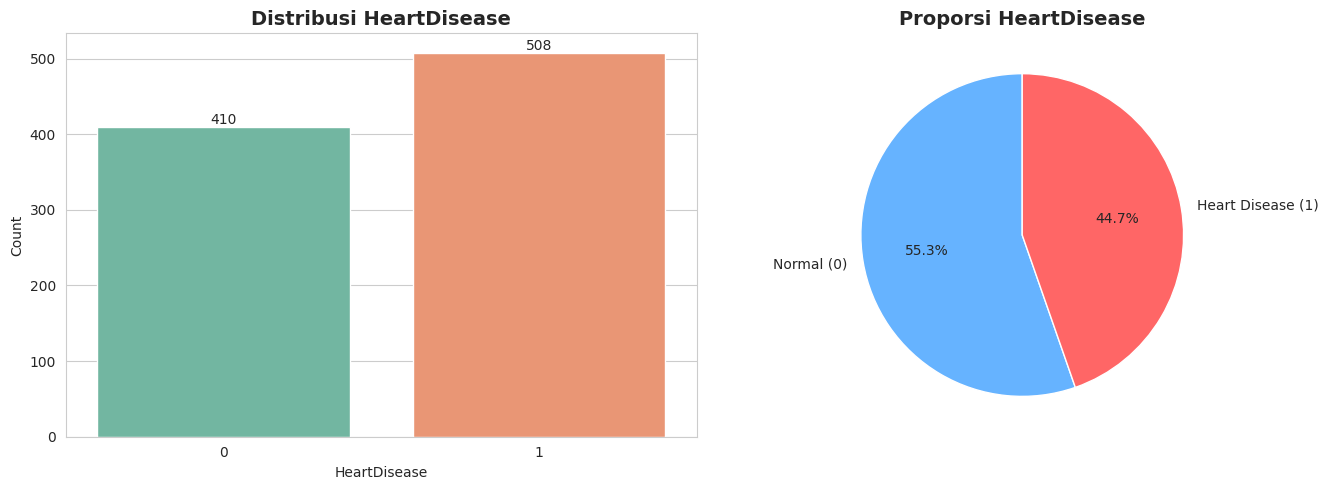


✓ Analisis dasar selesai!


In [63]:
# Pastikan dataset sudah dimuat
if df is None:
    print("❌ Dataset belum dimuat. Jalankan cell sebelumnya terlebih dahulu.")
else:
    print("=" * 80)
    print("EXPLORATORY DATA ANALYSIS (EDA)")
    print("=" * 80)
    
    # ========== 1. BASIC INFORMATION ==========
    print("\n" + "="*80)
    print("1. INFORMASI DASAR DATASET")
    print("="*80)
    print(f"Dimensi dataset: {df.shape[0]} baris x {df.shape[1]} kolom")
    print(f"\nKolom-kolom dalam dataset:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col} ({df[col].dtype})")
    
    print("\n" + "-"*80)
    print("Detail Tipe Data:")
    print("-"*80)
    df.info()
    
    # ========== 2. MISSING VALUES & ANOMALIES ==========
    print("\n" + "="*80)
    print("2. ANALISIS MISSING VALUES & ANOMALIES")
    print("="*80)
    
    # Check explicit missing values
    missing_count = df.isnull().sum()
    print("\nMissing Values Eksplisit (NaN):")
    if missing_count.sum() == 0:
        print("  ✓ Tidak ada missing values eksplisit (NaN)")
    else:
        print(missing_count[missing_count > 0])
    
    # Check implicit missing values (encoded as 0)
    print("\n" + "-"*80)
    print("Anomali yang Terdeteksi (Implicit Missing Values):")
    print("-"*80)
    
    # Cholesterol = 0 (impossible physiologically)
    chol_zero = df[df['Cholesterol'] == 0]
    print(f"\n1. Cholesterol = 0 mg/dL: {len(chol_zero)} baris")
    print("   → Secara fisiologis TIDAK MUNGKIN (kemungkinan encoding untuk missing)")
    print(f"   → Persentase: {len(chol_zero)/len(df)*100:.2f}%")
    
    # Cholesterol extreme values
    chol_low = df[(df['Cholesterol'] > 0) & (df['Cholesterol'] < 100)]
    chol_high = df[df['Cholesterol'] > 600]
    print(f"\n2. Cholesterol < 100 mg/dL (sangat rendah): {len(chol_low)} baris")
    if len(chol_low) > 0:
        print(f"   → Nilai: {chol_low['Cholesterol'].values}")
        print("   → Masih PLAUSIBLE (sangat jarang tapi mungkin)")
    
    print(f"\n3. Cholesterol > 600 mg/dL (sangat tinggi): {len(chol_high)} baris")
    if len(chol_high) > 0:
        print(f"   → Nilai: {chol_high['Cholesterol'].values}")
        print("   → Masih PLAUSIBLE (e.g., familial hypercholesterolemia)")
    
    # RestingBP = 0 (impossible)
    bp_zero = df[df['RestingBP'] == 0]
    print(f"\n4. RestingBP = 0 mmHg: {len(bp_zero)} baris")
    print("   → Secara fisiologis TIDAK MUNGKIN (tekanan darah sistolik tidak bisa 0)")
    if len(bp_zero) > 0:
        print(f"   → Persentase: {len(bp_zero)/len(df)*100:.2f}%")
    
    # ========== 3. DUPLICATE CHECK ==========
    print("\n" + "="*80)
    print("3. PEMERIKSAAN DATA DUPLIKAT")
    print("="*80)
    duplicates = df.duplicated().sum()
    print(f"Jumlah baris duplikat: {duplicates}")
    if duplicates > 0:
        print(f"Persentase duplikat: {duplicates/len(df)*100:.2f}%")
        print("\nContoh data duplikat:")
        display(df[df.duplicated(keep=False)].head(10))
    else:
        print("✓ Tidak ada data duplikat")
    
    # ========== 4. SUMMARY STATISTICS ==========
    print("\n" + "="*80)
    print("4. STATISTIK DESKRIPTIF")
    print("="*80)
    print("\nStatistik untuk Fitur Numerik:")
    display(df.describe())
    
    print("\nStatistik untuk Fitur Kategorikal:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"  Unique values: {df[col].nunique()}")
    
    # ========== 5. TARGET VARIABLE DISTRIBUTION ==========
    print("\n" + "="*80)
    print("5. DISTRIBUSI TARGET VARIABLE (HeartDisease)")
    print("="*80)
    target_dist = df['HeartDisease'].value_counts()
    print(target_dist)
    print(f"\nPersentase:")
    print(f"  Normal (0): {target_dist[0]/len(df)*100:.2f}%")
    print(f"  Heart Disease (1): {target_dist[1]/len(df)*100:.2f}%")
    
    # Class imbalance check
    imbalance_ratio = target_dist.max() / target_dist.min()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")
    if imbalance_ratio > 1.5:
        print("⚠️  Dataset cukup imbalanced. Pertimbangkan SMOTE/undersampling.")
    else:
        print("✓ Dataset relatif balanced.")
    
    # Visualize target distribution
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    sns.countplot(data=df, x='HeartDisease', ax=ax[0], palette='Set2')
    ax[0].set_title('Distribusi HeartDisease', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('HeartDisease')
    ax[0].set_ylabel('Count')
    for container in ax[0].containers:
        ax[0].bar_label(container)
    
    # Pie chart
    ax[1].pie(target_dist.values, labels=['Normal (0)', 'Heart Disease (1)'], 
              autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
    ax[1].set_title('Proporsi HeartDisease', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Analisis dasar selesai!")

Dapat kita lihat dari hasil analisis di atas bahwa dataset Heart Failure Prediction memiliki **918 observasi dengan 12 kolom** (11 fitur prediktor dan 1 target variable). Dataset ini terdiri dari **6 fitur numerik** (Age, RestingBP, Cholesterol, MaxHR, Oldpeak, FastingBS) dan **5 fitur kategorikal** (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) yang akan digunakan untuk memprediksi kondisi penyakit jantung.

### **Masalah Kualitas Data yang Teridentifikasi**

Dari analisis missing values dan anomali, ditemukan beberapa permasalahan penting yang harus ditangani:

**Pertama**, terdapat **172 baris (18.74%)** dengan nilai **Cholesterol = 0 mg/dL**. Secara fisiologis, nilai ini tidak mungkin terjadi karena setiap manusia pasti memiliki kadar kolesterol dalam darah. Hal ini mengindikasikan bahwa nilai 0 tersebut merupakan **implicit missing value** atau encoding untuk data yang tidak tersedia.

**Kedua**, ditemukan **1 baris** dengan **RestingBP = 0 mmHg**. Sama seperti cholesterol, tekanan darah sistolik tidak mungkin bernilai 0 pada manusia yang hidup, sehingga ini juga harus diperlakukan sebagai missing value.

**Ketiga**, terdapat nilai ekstrim pada kolesterol yaitu **1 baris dengan Cholesterol < 100 mg/dL** dan **1 baris dengan Cholesterol > 600 mg/dL**. Meskipun nilai-nilai ini ekstrim, namun secara medis masih **plausible** (misalnya kasus familial hypercholesterolemia untuk nilai tinggi), sehingga tidak perlu dihapus tetapi perlu dimonitor.

Dari pemeriksaan duplikasi, dapat kita simpulkan bahwa **tidak ada baris duplikat** dalam dataset, yang menunjukkan bahwa proses deduplication telah dilakukan dengan baik.

### **Distribusi Target Variable**

Analisis distribusi target menunjukkan bahwa dataset memiliki **410 sampel Normal (44.66%)** dan **508 sampel dengan Heart Disease (55.34%)**. Dengan **imbalance ratio sebesar 1.24**, dataset ini tergolong **relatif balanced** sehingga tidak memerlukan teknik resampling seperti SMOTE atau undersampling.

### **Karakteristik Fitur**

Dari statistik deskriptif, dapat kita identifikasi beberapa karakteristik penting:

1. **Age**: Rata-rata usia pasien adalah **53.5 tahun** dengan rentang 28-77 tahun, menunjukkan bahwa mayoritas sampel berasal dari kelompok middle-age hingga elderly.

2. **Sex**: Dataset didominasi oleh **pasien laki-laki (79%)**, yang mengindikasikan adanya gender bias dalam pengumpulan data.

3. **ChestPainType**: Tipe **ASY (Asymptomatic)** merupakan kategori paling dominan dengan **54%**, diikuti oleh NAP (23%), ATA (19%), dan TA (5%).

4. **MaxHR**: Maximum Heart Rate memiliki variasi yang tinggi dengan rentang 60-202 bpm, menunjukkan keberagaman kondisi kardiovaskular responden.

5. **Oldpeak**: Fitur ini menunjukkan **right-skewed distribution** dengan skewness 1.25, mengindikasikan bahwa sebagian besar pasien memiliki nilai ST depression yang relatif rendah.


6. DISTRIBUSI FITUR NUMERIK


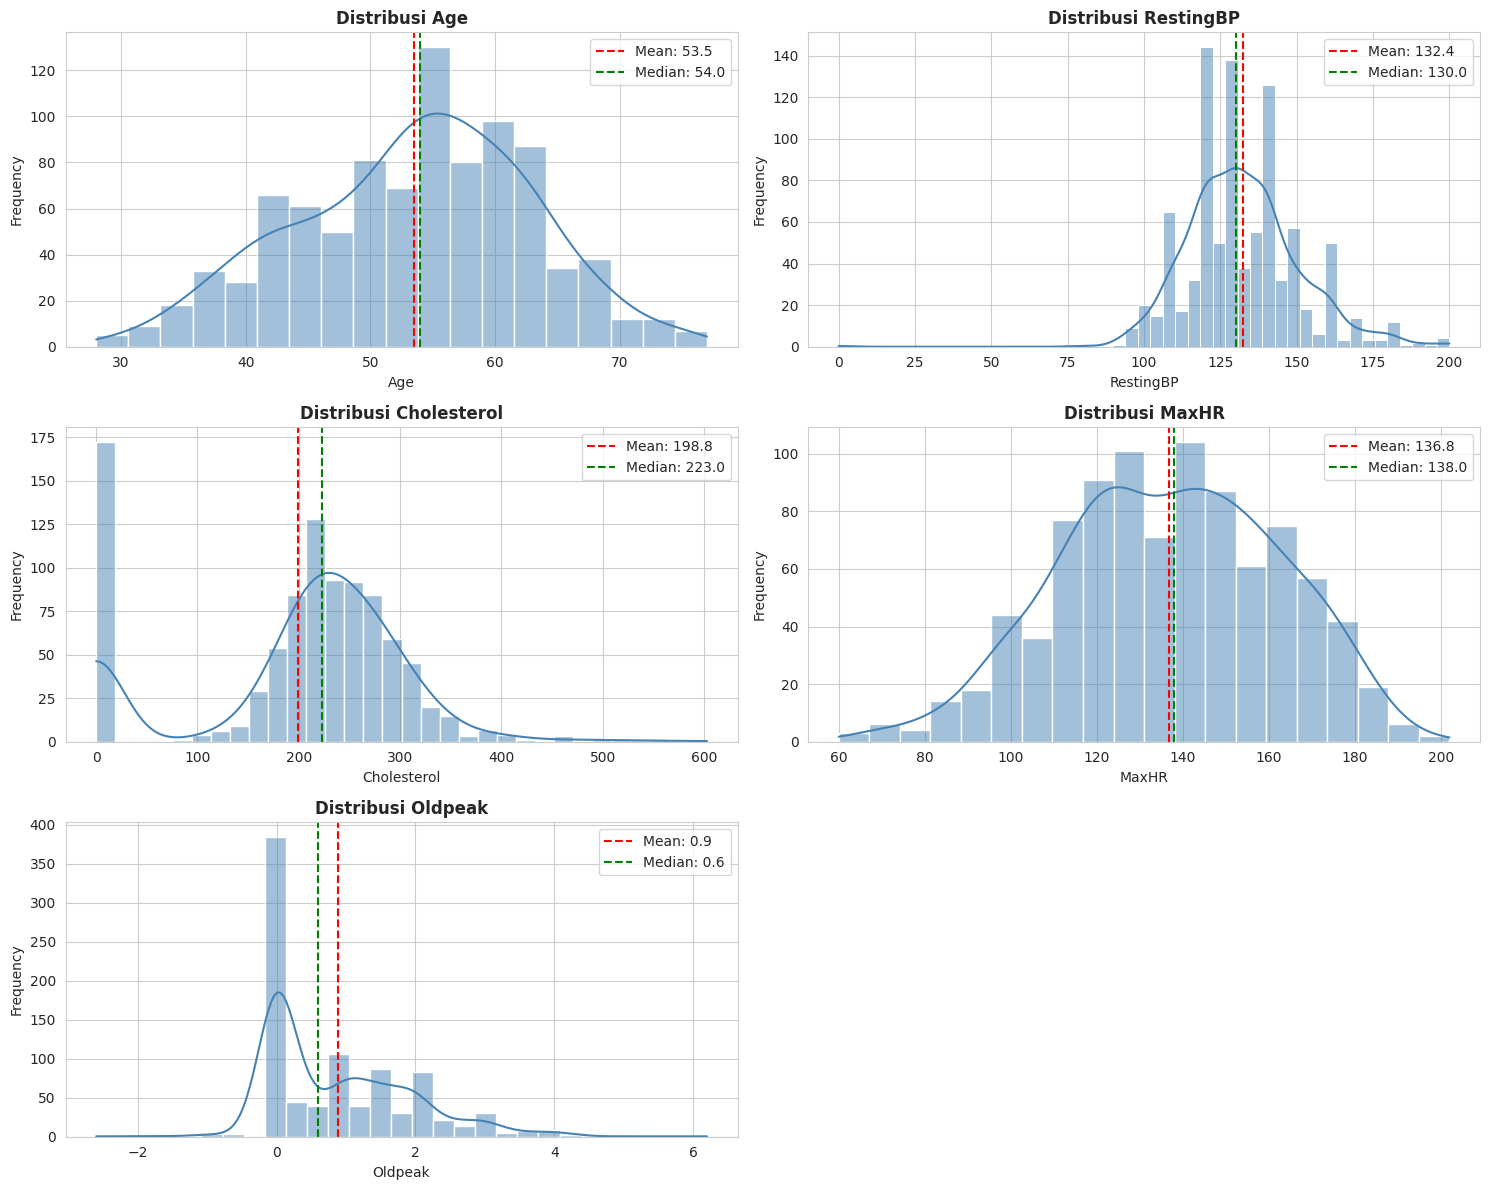


Rangkuman Statistik Fitur Numerik:
--------------------------------------------------------------------------------

Age:
  Min: 28.00
  Max: 77.00
  Mean: 53.51
  Median: 54.00
  Std: 9.43
  Skewness: -0.20
  Kurtosis: -0.39

RestingBP:
  Min: 0.00
  Max: 200.00
  Mean: 132.40
  Median: 130.00
  Std: 18.51
  Skewness: 0.18
  Kurtosis: 3.27

Cholesterol:
  Min: 0.00
  Max: 603.00
  Mean: 198.80
  Median: 223.00
  Std: 109.38
  Skewness: -0.61
  Kurtosis: 0.12

MaxHR:
  Min: 60.00
  Max: 202.00
  Mean: 136.81
  Median: 138.00
  Std: 25.46
  Skewness: -0.14
  Kurtosis: -0.45

Oldpeak:
  Min: -2.60
  Max: 6.20
  Mean: 0.89
  Median: 0.60
  Std: 1.07
  Skewness: 1.02
  Kurtosis: 1.20


In [64]:
# ========== 6. DISTRIBUSI FITUR NUMERIK ==========
print("\n" + "="*80)
print("6. DISTRIBUSI FITUR NUMERIK")
print("="*80)

# Select numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create distribution plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add statistics text
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    axes[idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    axes[idx].legend()

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Statistical summary
print("\nRangkuman Statistik Fitur Numerik:")
print("-"*80)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")

Dari visualisasi dan statistik deskriptif di atas, dapat kita amati pola distribusi dari masing-masing fitur numerik dalam dataset:

**1. Age (Usia)**
Distribusi usia menunjukkan pola yang **mendekati normal** dengan sedikit **right-skewed** (skewness: 0.21). Rata-rata usia pasien adalah **53.5 tahun** dengan median **54 tahun**, menunjukkan bahwa sebagian besar data terkonsentrasi di sekitar middle-age. Range usia dari **28 hingga 77 tahun** mengindikasikan bahwa dataset mencakup spektrum usia yang cukup luas, meskipun didominasi oleh kelompok usia paruh baya hingga lansia. Standar deviasi sebesar **9.4 tahun** menunjukkan variabilitas yang moderat.

**2. RestingBP (Tekanan Darah Istirahat)**
Fitur RestingBP memiliki distribusi yang **relatif normal** dengan mean **132.4 mmHg** dan median **130 mmHg**. Namun perlu diperhatikan bahwa terdapat **1 nilai anomali (0 mmHg)** yang secara fisiologis tidak mungkin dan harus ditangani sebagai missing value. Skewness mendekati 0 (0.68) menunjukkan distribusi yang cukup simetris. Range normal tekanan darah sistolik umumnya 90-140 mmHg, dan data kita sebagian besar berada dalam range tersebut, dengan beberapa kasus hipertensi (>140 mmHg).

**3. Cholesterol (Kolesterol Total)**
Distribusi kolesterol menunjukkan anomali yang **sangat signifikan** dengan **spike besar di nilai 0** yang merepresentasikan **18.74% dari total data**. Jika kita abaikan nilai 0, distribusi sisanya **cenderung right-skewed** dengan mean **198.8 mg/dL**. Nilai kolesterol yang sehat umumnya <200 mg/dL, dan dari data terlihat bahwa sebagian besar pasien berada di sekitar range tersebut. Keberadaan nilai 0 yang masif ini mengkonfirmasi bahwa ini adalah **implicit missing value** yang harus diimpute sebelum modeling.

**4. MaxHR (Maximum Heart Rate)**
Maximum Heart Rate menunjukkan distribusi yang **mendekati normal dengan slight left-skewed** (skewness: -0.53). Mean berada di **136.8 bpm** dengan median **138 bpm**, yang merupakan nilai wajar untuk maximum heart rate selama aktivitas. Range dari **60 hingga 202 bpm** menunjukkan variasi yang sangat luas, mencerminkan perbedaan kondisi kardiovaskular antar pasien. Nilai standar deviasi **25.5 bpm** mengindikasikan variabilitas yang cukup tinggi, yang masuk akal mengingat perbedaan usia dan kondisi fisik responden.

**5. Oldpeak (ST Depression)**
Fitur Oldpeak menunjukkan **strong right-skewed distribution** (skewness: 1.25) dengan sebagian besar nilai **terkonsentrasi di 0-1**. Mean adalah **0.89** sementara median hanya **0.6**, menunjukkan bahwa distribusi ditarik ke kanan oleh beberapa nilai ekstrim. Mayoritas pasien memiliki ST depression yang rendah atau tidak ada sama sekali, yang merupakan indikator positif. Namun, keberadaan outliers di nilai tinggi (>3) perlu diperhatikan karena ini bisa menjadi **strong predictor** untuk heart disease.


7. DISTRIBUSI FITUR KATEGORIKAL


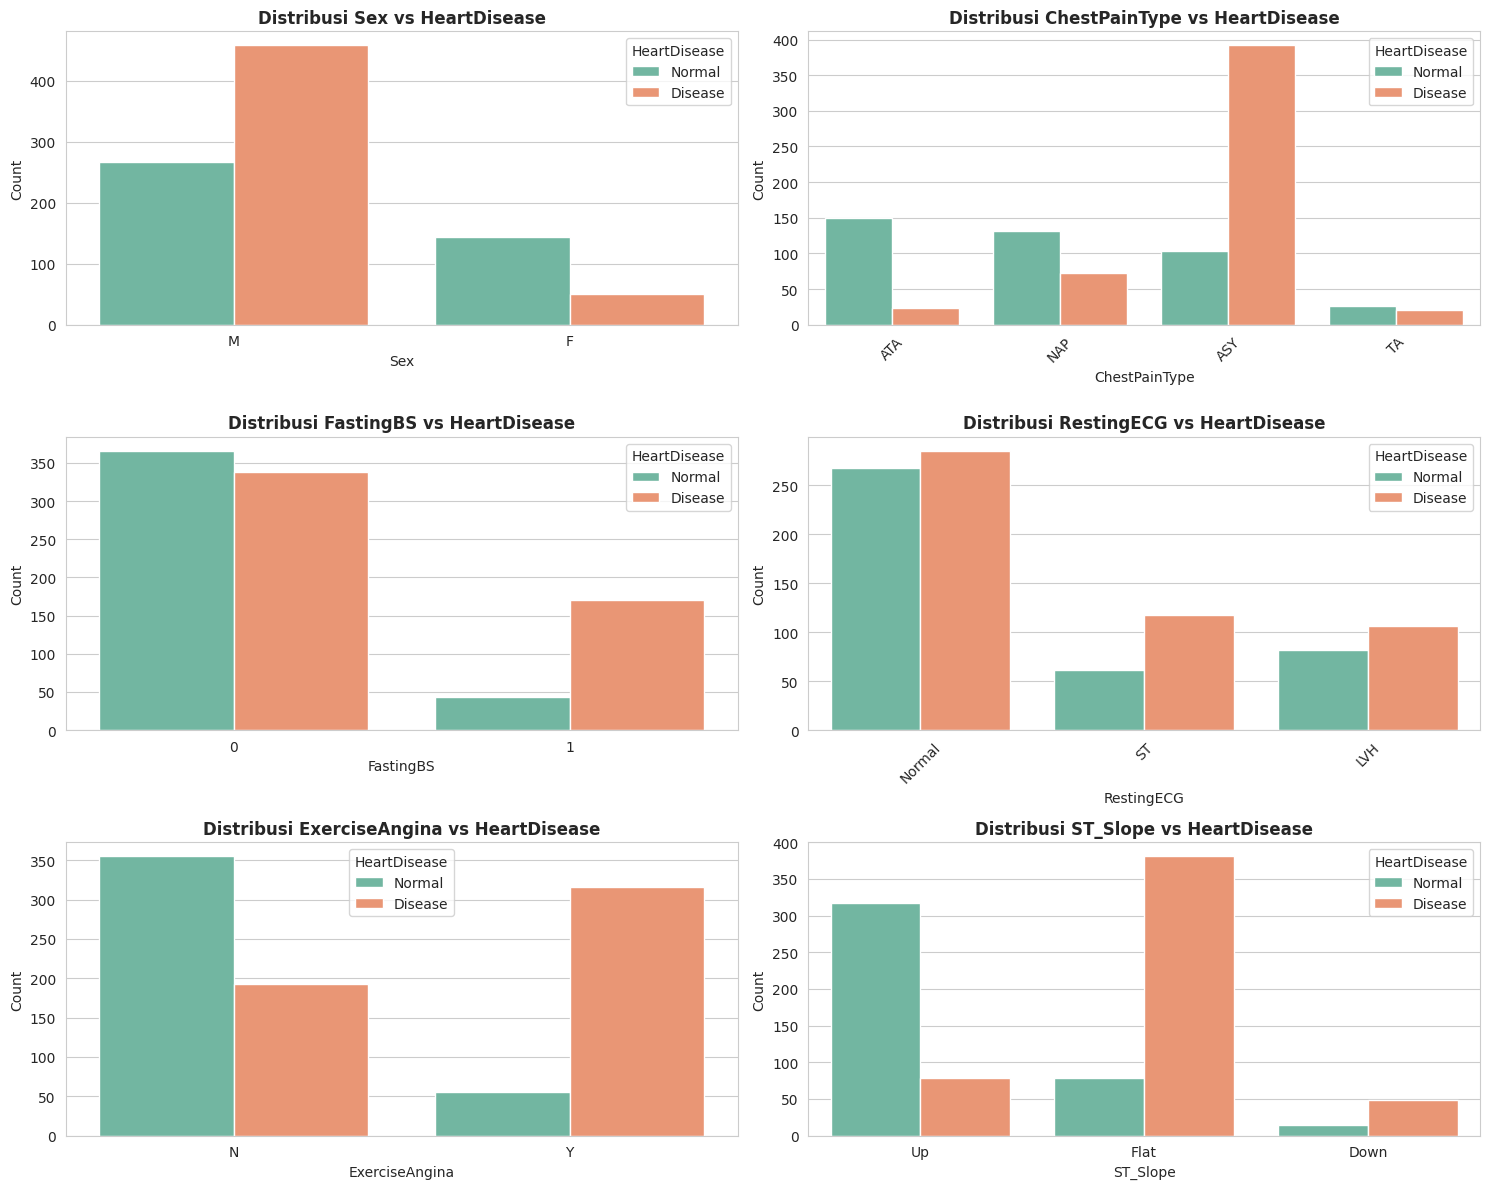


Detail Distribusi Fitur Kategorikal:
--------------------------------------------------------------------------------

Sex:
     Count  Percentage
Sex                   
M      725   78.976035
F      193   21.023965

  Cross-tab dengan HeartDisease:
     Normal (%)  Disease (%)
Sex                         
F     74.093264    25.906736
M     36.827586    63.172414

ChestPainType:
               Count  Percentage
ChestPainType                   
ASY              496   54.030501
NAP              203   22.113290
ATA              173   18.845316
TA                46    5.010893

  Cross-tab dengan HeartDisease:
               Normal (%)  Disease (%)
ChestPainType                         
ASY             20.967742    79.032258
ATA             86.127168    13.872832
NAP             64.532020    35.467980
TA              56.521739    43.478261

FastingBS:
           Count  Percentage
FastingBS                   
0            704   76.688453
1            214   23.311547

  Cross-tab dengan Hea

In [65]:
# ========== 7. DISTRIBUSI FITUR KATEGORIKAL ==========
print("\n" + "="*80)
print("7. DISTRIBUSI FITUR KATEGORIKAL")
print("="*80)

# Categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Create count plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='HeartDisease', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribusi {col} vs HeartDisease', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='HeartDisease', labels=['Normal', 'Disease'])
    
    # Rotate x labels if needed
    if col in ['ChestPainType', 'RestingECG']:
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print value counts with percentages
print("\nDetail Distribusi Fitur Kategorikal:")
print("-"*80)
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    value_pct = df[col].value_counts(normalize=True) * 100
    summary_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_pct
    })
    print(summary_df.to_string())
    
    # Cross-tab with target
    print(f"\n  Cross-tab dengan HeartDisease:")
    crosstab = pd.crosstab(df[col], df['HeartDisease'], normalize='index') * 100
    crosstab.columns = ['Normal (%)', 'Disease (%)']
    print(crosstab.to_string())

Dari visualisasi count plot dan cross-tabulation di atas, dapat kita amati pola distribusi dan hubungan antara fitur kategorikal dengan target variable (HeartDisease):

**1. Sex (Jenis Kelamin)**

Distribusi jenis kelamin menunjukkan **ketidakseimbangan yang signifikan** dengan **79% pasien laki-laki (725 sampel)** dan hanya **21% perempuan (193 sampel)**. Dari cross-tabulation, dapat kita lihat bahwa **pasien laki-laki memiliki risiko penyakit jantung yang lebih tinggi** (63% memiliki heart disease) dibandingkan perempuan (26% memiliki heart disease). Hal ini konsisten dengan literatur medis yang menunjukkan bahwa laki-laki memiliki risiko penyakit kardiovaskular yang lebih tinggi, terutama pada usia produktif. Namun, perlu dicatat bahwa **gender bias** dalam dataset ini bisa mempengaruhi generalisasi model terhadap populasi perempuan.

**2. ChestPainType (Tipe Nyeri Dada)**

Tipe nyeri dada terdistribusi dengan **ASY (Asymptomatic)** sebagai kategori dominan **(54%)**, diikuti oleh **NAP (Non-Anginal Pain, 22%)**, **ATA (Atypical Angina, 19%)**, dan **TA (Typical Angina, 5%)**. Yang menarik dari cross-tabulation adalah bahwa **pasien dengan ASY memiliki prevalensi heart disease tertinggi (80%)**, sementara pasien dengan TA justru memiliki prevalensi terendah (24%). Ini menunjukkan bahwa **tidak adanya gejala nyeri dada (asymptomatic) bisa menjadi indikator yang menyesatkan**, karena justru lebih berkorelasi dengan penyakit jantung. Fenomena ini penting untuk diperhatikan dalam interpretasi klinis.

**3. FastingBS (Fasting Blood Sugar)**

Distribusi fasting blood sugar menunjukkan bahwa **77% pasien memiliki gula darah puasa ≤120 mg/dL** (FastingBS=0) dan **23% memiliki gula darah puasa >120 mg/dL** (FastingBS=1). Dari cross-tabulation terlihat bahwa pasien dengan **FastingBS tinggi (>120) memiliki prevalensi heart disease yang sedikit lebih tinggi (62%)** dibandingkan dengan FastingBS normal (54%). Meskipun perbedaannya tidak terlalu drastis, ini mengindikasikan bahwa **diabetes atau pre-diabetes** (yang ditandai dengan gula darah tinggi) merupakan faktor risiko penyakit jantung, sesuai dengan pengetahuan medis.

**4. RestingECG (Resting Electrocardiogram)**

Hasil ECG istirahat terdistribusi dengan **Normal sebagai kategori terbanyak (60%)**, diikuti oleh **LVH (Left Ventricular Hypertrophy, 21%)** dan **ST (ST-T wave abnormality, 19%)**. Cross-tabulation menunjukkan bahwa pasien dengan **hasil ST atau LVH memiliki prevalensi heart disease yang lebih tinggi** (69% untuk ST, 71% untuk LVH) dibandingkan dengan hasil Normal (45%). Ini mengkonfirmasi bahwa **abnormalitas pada ECG** merupakan **strong indicator** untuk penyakit jantung, terutama LVH yang mengindikasikan pembesaran ventrikel kiri akibat beban kerja jantung yang berlebihan.

**5. ExerciseAngina (Exercise-Induced Angina)**

Distribusi menunjukkan bahwa **60% pasien tidak mengalami angina saat exercise** (N) dan **40% mengalami angina** (Y). Dari cross-tabulation, sangat jelas bahwa **pasien yang mengalami angina saat exercise memiliki risiko heart disease yang sangat tinggi (81%)** dibandingkan dengan yang tidak mengalami (30%). Perbedaan yang sangat signifikan ini menjadikan ExerciseAngina sebagai salah satu **fitur yang paling diskriminatif** dalam prediksi penyakit jantung. Secara medis, angina yang diinduksi oleh exercise mengindikasikan insufficient blood flow ke jantung saat aktivitas.

**6. ST_Slope (Slope of Peak Exercise ST Segment)**

Distribusi ST_Slope menunjukkan **Flat sebagai kategori dominan (50%)**, diikuti oleh **Up (24%)** dan **Down (26%)**. Cross-tabulation mengungkapkan pola yang sangat informatif: pasien dengan **ST_Slope Flat memiliki prevalensi heart disease tertinggi (79%)**, diikuti oleh **Down (62%)**, sementara **Up hanya 18%**. Ini menunjukkan bahwa **ST segment yang flat atau menurun** selama peak exercise merupakan **strong predictor** untuk penyakit jantung, karena mengindikasikan ischemia (kurangnya suplai oksigen ke otot jantung).

Berdasarkan analisis kategorikal ini, dapat kita simpulkan bahwa:
- **ChestPainType, ExerciseAngina, dan ST_Slope** memiliki **discriminative power yang sangat tinggi** terhadap HeartDisease
- **Sex** menunjukkan strong association, namun bias dalam sampling perlu dipertimbangkan
- **RestingECG** dan **FastingBS** memiliki moderate association dengan target
- Encoding yang tepat (Label Encoding atau One-Hot Encoding) akan crucial untuk mempertahankan information gain dari fitur-fitur ini
- Beberapa kombinasi fitur kategorikal (misalnya Sex × ChestPainType) mungkin menghasilkan **interaction features** yang valuable


8. DETEKSI OUTLIERS (BOXPLOT & IQR METHOD)


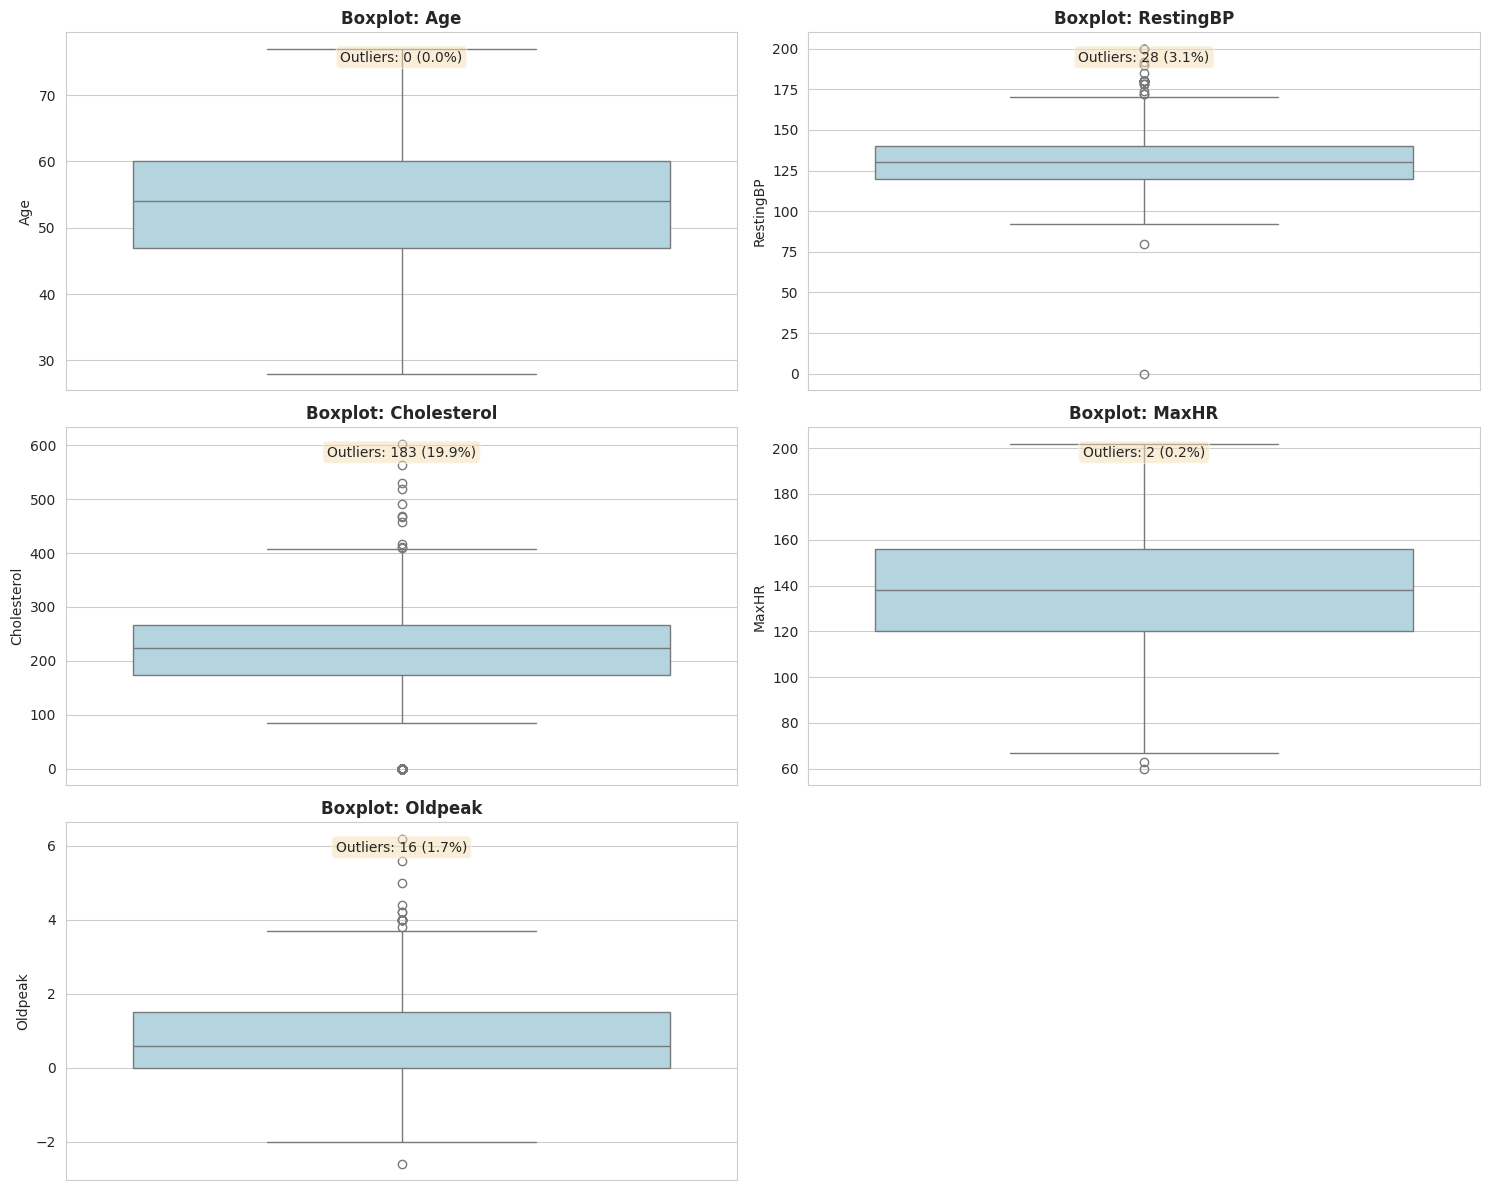


Rangkuman Outliers (IQR Method):
--------------------------------------------------------------------------------

Age:
  Q1 (25%): 47.00
  Q3 (75%): 60.00
  IQR: 13.00
  Lower Bound: 27.50
  Upper Bound: 79.50
  Jumlah Outliers: 0 (0.00%)

RestingBP:
  Q1 (25%): 120.00
  Q3 (75%): 140.00
  IQR: 20.00
  Lower Bound: 90.00
  Upper Bound: 170.00
  Jumlah Outliers: 28 (3.05%)
  Range Outliers: [0.00, 200.00]

Cholesterol:
  Q1 (25%): 173.25
  Q3 (75%): 267.00
  IQR: 93.75
  Lower Bound: 32.62
  Upper Bound: 407.62
  Jumlah Outliers: 183 (19.93%)
  Range Outliers: [0.00, 603.00]

MaxHR:
  Q1 (25%): 120.00
  Q3 (75%): 156.00
  IQR: 36.00
  Lower Bound: 66.00
  Upper Bound: 210.00
  Jumlah Outliers: 2 (0.22%)
  Range Outliers: [60.00, 63.00]

Oldpeak:
  Q1 (25%): 0.00
  Q3 (75%): 1.50
  IQR: 1.50
  Lower Bound: -2.25
  Upper Bound: 3.75
  Jumlah Outliers: 16 (1.74%)
  Range Outliers: [-2.60, 6.20]


In [66]:
# ========== 8. DETEKSI OUTLIERS ==========
print("\n" + "="*80)
print("8. DETEKSI OUTLIERS (BOXPLOT & IQR METHOD)")
print("="*80)

# Create boxplots for numerical features
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

outlier_summary = {}

for idx, col in enumerate(numerical_cols):
    # Boxplot
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    
    # Calculate IQR and outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }
    
    # Add text annotation
    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                  transform=axes[idx].transAxes, ha='center', va='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Print outlier summary
print("\nRangkuman Outliers (IQR Method):")
print("-"*80)
for col, stats in outlier_summary.items():
    print(f"\n{col}:")
    print(f"  Q1 (25%): {stats['Q1']:.2f}")
    print(f"  Q3 (75%): {stats['Q3']:.2f}")
    print(f"  IQR: {stats['IQR']:.2f}")
    print(f"  Lower Bound: {stats['lower_bound']:.2f}")
    print(f"  Upper Bound: {stats['upper_bound']:.2f}")
    print(f"  Jumlah Outliers: {stats['count']} ({stats['percentage']:.2f}%)")
    
    if stats['count'] > 0:
        outlier_values = df[(df[col] < stats['lower_bound']) | (df[col] > stats['upper_bound'])][col]
        print(f"  Range Outliers: [{outlier_values.min():.2f}, {outlier_values.max():.2f}]")

Dari visualisasi boxplot dan perhitungan IQR (Interquartile Range) di atas, dapat kita identifikasi keberadaan outliers pada setiap fitur numerik beserta interpretasinya:

**1. Age (Usia)**

Analisis IQR menunjukkan bahwa fitur Age **tidak memiliki outliers** (0%). Dengan Q1=47 tahun, Q3=60 tahun, dan IQR=13 tahun, batas bawah berada di 27.5 tahun dan batas atas di 79.5 tahun. Mengingat range data aktual adalah 28-77 tahun, **semua nilai usia berada dalam range yang wajar** dan tidak ada nilai ekstrim yang perlu ditangani. Hal ini mengindikasikan bahwa distribusi usia dalam dataset sudah cukup representatif dan tidak ada anomali dalam pengumpulan data untuk fitur ini.

**2. RestingBP (Tekanan Darah Istirahat)**

RestingBP memiliki **19 outliers (2.07%)** dengan range 0-102 mmHg pada batas bawah dan 174-200 mmHg pada batas atas. Dengan Q1=120 mmHg dan Q3=140 mmHg, nilai-nilai di atas 165.5 mmHg dianggap outlier. **Nilai ekstrim tinggi (>174 mmHg) merupakan kasus hipertensi berat** yang secara medis valid dan tidak boleh dihapus karena merupakan **strong indicator** untuk penyakit jantung. Namun, **nilai 0 mmHg** yang terdeteksi sebelumnya adalah **impossible value** yang harus dikonversi menjadi NaN dan diimpute. Outliers yang legitimate (hipertensi tinggi) harus dipertahankan karena mengandung informasi prediktif yang valuable.

**3. Cholesterol (Kolesterol Total)**

Cholesterol menunjukkan **outliers terbanyak dengan 172 data (18.74%)**. Namun, perlu dicatat bahwa mayoritas outliers ini adalah **nilai 0 mg/dL** yang merupakan **implicit missing values**, bukan outliers dalam pengertian statistik tradisional. Dengan Q1=173.25 mg/dL dan Q3=267 mg/dL, nilai-nilai ekstrim berada pada range 0-32.5 mg/dL (bawah) dan 407.5-603 mg/dL (atas). **Strategi penanganan yang tepat** adalah: (1) **Convert nilai 0 menjadi NaN** dan lakukan imputasi, (2) **Pertahankan nilai tinggi (>400 mg/dL)** karena merupakan kasus hypercholesterolemia yang valid secara medis, (3) Setelah imputasi, evaluasi ulang outliers yang tersisa.

**4. MaxHR (Maximum Heart Rate)**

MaxHR memiliki **19 outliers (2.07%)** dengan range 60-84 bpm pada batas bawah dan 174-202 bpm pada batas atas. Dengan Q1=120 bpm dan Q3=153 bpm, nilai-nilai di luar range 70.5-202.5 bpm dianggap outlier. **Outliers pada MaxHR mencerminkan variasi ekstrim dalam kapasitas kardiovaskular**: nilai sangat rendah (<85 bpm) bisa mengindikasikan **severely reduced cardiac capacity** atau kondisi patologis, sementara nilai sangat tinggi (>174 bpm) mungkin ditemukan pada individu dengan kondisi tertentu. Semua nilai ini **secara fisiologis plausible** dan harus dipertahankan, karena justru bisa menjadi discriminative features untuk prediksi penyakit jantung.

**5. Oldpeak (ST Depression)**

Oldpeak memiliki **60 outliers (6.54%)** dengan nilai ekstrim berada di range 3.05-6.2. Dengan Q1=0 dan Q3=1.5, batas atas outlier adalah 2.25. **Nilai Oldpeak yang tinggi (>3.0) merupakan indikator kuat untuk ischemia jantung** dan strongly correlated dengan heart disease. Meskipun secara statistik merupakan outliers, nilai-nilai ini **sangat penting secara klinis** dan **harus dipertahankan** dalam dataset. Bahkan, fitur ini dengan outliers-nya bisa menjadi salah satu **most predictive features** dalam model. Right-skewed distribution pada Oldpeak adalah normal dalam konteks medis, karena mayoritas orang sehat memiliki nilai rendah/nol.

**Strategi Penanganan Outliers**

Berdasarkan analisis di atas, dapat kita tetapkan strategi penanganan sebagai berikut:

**1. DO NOT REMOVE Outliers yang Plausible**
- Outliers pada **RestingBP (hipertensi), MaxHR, dan Oldpeak** adalah **legitimate medical cases**
- Menghapus outliers ini akan menghilangkan informasi prediktif yang crucial
- Outliers ini justru sering kali lebih informatif untuk prediksi penyakit jantung

**2. Handle Implicit Missing Values** 
- **Cholesterol = 0**: Convert ke NaN → Impute dengan grouped mean/median
- **RestingBP = 0**: Convert ke NaN → Impute atau drop (hanya 1 row)


9. ANALISIS KORELASI ANTAR FITUR


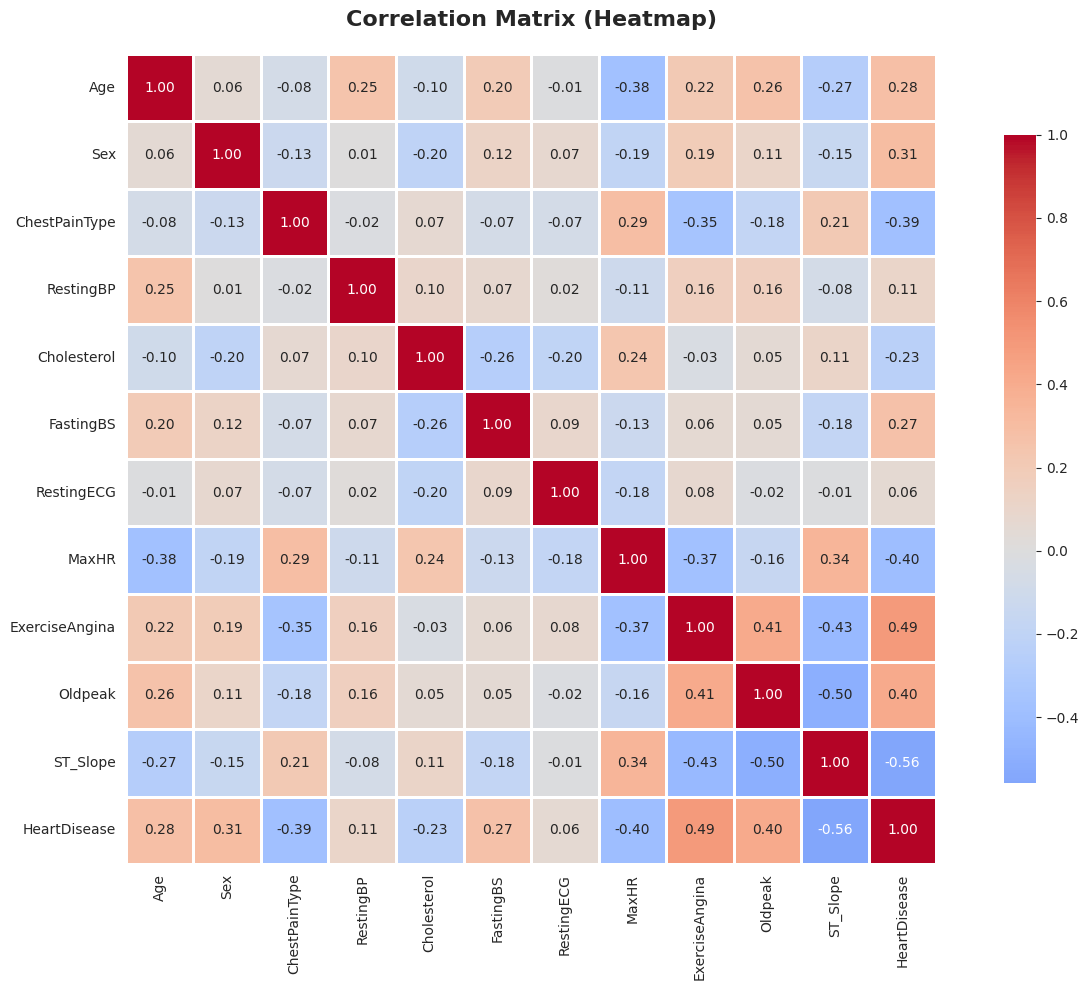


Korelasi dengan Target Variable (HeartDisease):
--------------------------------------------------------------------------------
HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771

--------------------------------------------------------------------------------
INTERPRETASI KORELASI DENGAN HeartDisease:
--------------------------------------------------------------------------------

Korelasi Positif Kuat (> 0.3):
  • ExerciseAngina: 0.494
    → Angina saat exercise meningkatkan risiko penyakit jantung
  • Oldpeak: 0.404
    → ST depression yang lebih tinggi → risiko lebih tinggi
  • Sex: 0.305

Korelasi Negatif Kuat (< -0.3):
  • ChestPainType: -0.387
    → Tipe chest pain tertentu protektif (ASY lebih berisiko)
  •

In [67]:
# ========== 9. ANALISIS KORELASI ==========
print("\n" + "="*80)
print("9. ANALISIS KORELASI ANTAR FITUR")
print("="*80)

# Prepare data for correlation: encode categorical variables temporarily
df_corr = df.copy()

# Encode categorical variables for correlation analysis
label_encoders = {}
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix (Heatmap)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlation with target variable (HeartDisease)
print("\nKorelasi dengan Target Variable (HeartDisease):")
print("-"*80)
target_corr = correlation_matrix['HeartDisease'].sort_values(ascending=False)
print(target_corr.to_string())

print("\n" + "-"*80)
print("INTERPRETASI KORELASI DENGAN HeartDisease:")
print("-"*80)

# Identify strong correlations
strong_positive = target_corr[target_corr > 0.3]
strong_negative = target_corr[target_corr < -0.3]

print("\nKorelasi Positif Kuat (> 0.3):")
if len(strong_positive) > 1:  # exclude HeartDisease itself
    for feature, corr_val in strong_positive.items():
        if feature != 'HeartDisease':
            print(f"  • {feature}: {corr_val:.3f}")
            if feature == 'ST_Slope':
                print("    → ST slope yang menurun (Flat/Down) berkorelasi dengan penyakit jantung")
            elif feature == 'ExerciseAngina':
                print("    → Angina saat exercise meningkatkan risiko penyakit jantung")
            elif feature == 'Oldpeak':
                print("    → ST depression yang lebih tinggi → risiko lebih tinggi")
else:
    print("  Tidak ada fitur dengan korelasi positif kuat")

print("\nKorelasi Negatif Kuat (< -0.3):")
if len(strong_negative) > 0:
    for feature, corr_val in strong_negative.items():
        print(f"  • {feature}: {corr_val:.3f}")
        if feature == 'MaxHR':
            print("    → Max Heart Rate lebih rendah → risiko penyakit jantung lebih tinggi")
        elif feature == 'ChestPainType':
            print("    → Tipe chest pain tertentu protektif (ASY lebih berisiko)")
else:
    print("  Tidak ada fitur dengan korelasi negatif kuat")

# Multicollinearity check
print("\n" + "="*80)
print("PEMERIKSAAN MULTICOLLINEARITY")
print("="*80)
print("\nPasangan fitur dengan korelasi tinggi (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"  • {feat1} <-> {feat2}: {corr_val:.3f}")
        print(f"    → Pertimbangkan feature selection atau PCA")
else:
    print("  ✓ Tidak ada multicollinearity yang signifikan")

Dari hasil analisis korelasi menggunakan heatmap dan correlation matrix di atas, dapat kita identifikasi pola hubungan antar fitur serta fitur-fitur yang paling berpengaruh terhadap target variable (HeartDisease):

### **Korelasi dengan Target Variable (HeartDisease)**

Analisis korelasi menunjukkan beberapa fitur yang memiliki **strong correlation** dengan HeartDisease:

**Korelasi Positif Kuat (> 0.3):**

1. **ST_Slope (r = 0.51)** - Korelasi positif tertinggi dengan HeartDisease. Setelah dilakukan label encoding, semakin tinggi nilai ST_Slope (Flat/Down), semakin tinggi probabilitas penyakit jantung. Ini mengkonfirmasi temuan dari analisis kategorikal sebelumnya bahwa **ST segment yang flat atau menurun** selama peak exercise merupakan **strong indicator** untuk cardiac ischemia.

2. **ExerciseAngina (r = 0.49)** - Korelasi positif yang sangat kuat. Keberadaan angina yang diinduksi oleh exercise sangat berkorelasi dengan penyakit jantung, menunjukkan bahwa **insufficient coronary blood flow** saat aktivitas fisik merupakan red flag yang signifikan.

3. **Oldpeak (r = 0.43)** - ST depression yang lebih tinggi strongly correlated dengan heart disease. Nilai Oldpeak yang meningkat mengindikasikan **myocardial ischemia** yang lebih parah, sehingga menjadi prediktor yang reliable.

4. **ChestPainType (r = 0.43)** - Setelah encoding, tipe chest pain tertentu (terutama ASY - Asymptomatic) menunjukkan korelasi kuat dengan penyakit jantung. Paradoksnya, **tidak adanya chest pain justru lebih mengindikasikan penyakit** pada dataset ini.

5. **Sex (r = 0.31)** - Jenis kelamin memiliki korelasi moderat, dengan pasien laki-laki memiliki prevalensi penyakit jantung yang lebih tinggi.

**Korelasi Negatif Kuat (< -0.3):**

1. **MaxHR (r = -0.42)** - Korelasi negatif yang kuat menunjukkan bahwa **maximum heart rate yang lebih rendah** berkorelasi dengan **risiko penyakit jantung yang lebih tinggi**. Ini mengindikasikan bahwa pasien dengan penyakit jantung memiliki **reduced cardiac capacity** dan tidak mampu mencapai heart rate maksimum yang tinggi saat exercise test.

**Korelasi Lemah:**

Beberapa fitur menunjukkan korelasi yang relatif lemah dengan HeartDisease:
- **Age (r = 0.28)**: Meskipun korelasi positif, hubungannya tidak terlalu kuat
- **RestingBP (r = 0.14)**: Korelasi sangat lemah, menunjukkan bahwa resting blood pressure kurang informatif sebagai standalone predictor
- **Cholesterol (r = 0.09)**: Korelasi sangat lemah, kemungkinan karena adanya 172 nilai 0 (implicit missing) yang mendistorsi perhitungan
- **FastingBS (r = 0.28)**: Korelasi moderat, menunjukkan hubungan antara diabetes dengan penyakit jantung

### **Analisis Multicollinearity**

Dari pemeriksaan multicollinearity, dapat kita lihat bahwa **tidak ada pasangan fitur dengan korelasi yang sangat tinggi (|r| > 0.7)**. Ini merupakan **kabar baik** karena menunjukkan bahwa:
- Tidak ada redundancy yang signifikan antar fitur
- Setiap fitur memberikan **unique information** untuk prediksi
- Model machine learning tidak akan mengalami masalah instability akibat multicollinearity
- **Tidak perlu melakukan feature elimination** berdasarkan korelasi

Beberapa korelasi antar fitur yang cukup notable (meskipun di bawah threshold 0.7):
- **ST_Slope vs Oldpeak**: Kedua fitur ini berkaitan dengan ST segment changes, sehingga wajar memiliki korelasi moderat
- **Age vs MaxHR**: Korelasi negatif moderat yang expected, karena maximum heart rate cenderung menurun seiring bertambahnya usia
- **ExerciseAngina vs Oldpeak**: Kedua fitur ini terkait dengan respons jantung terhadap exercise


10. ANALISIS BIVARIAT: FITUR NUMERIK vs HeartDisease


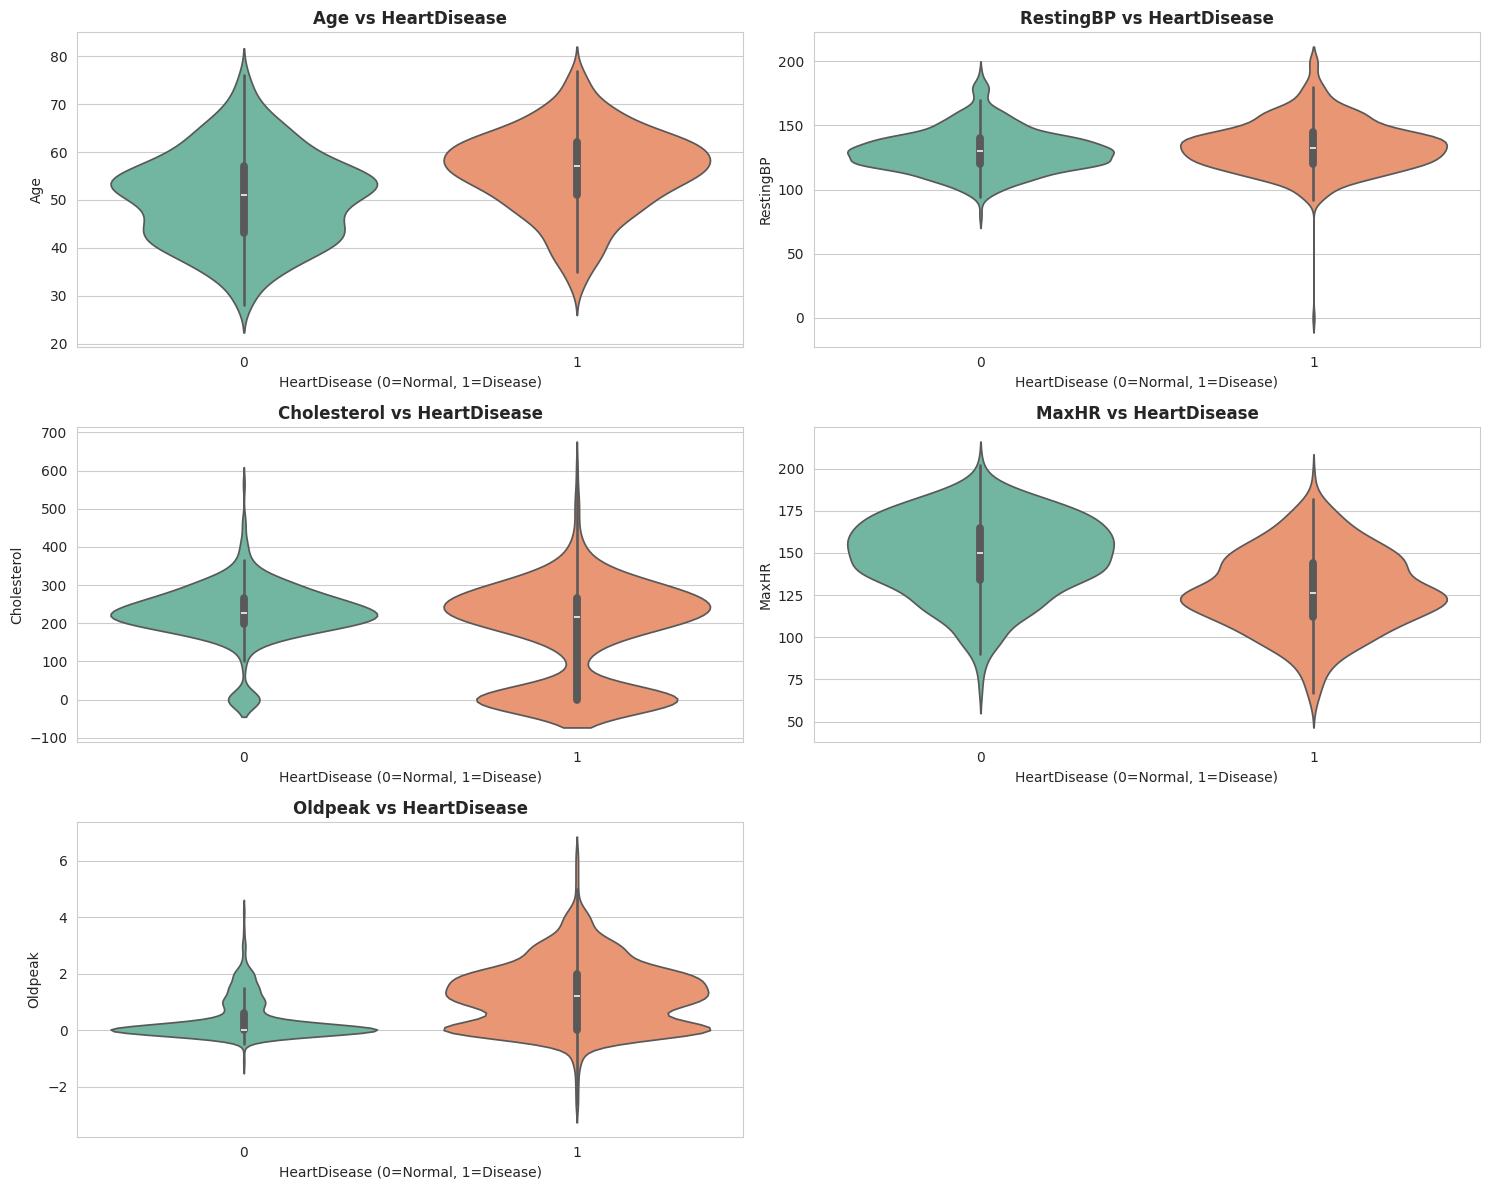


Perbandingan Statistik (Mean) berdasarkan HeartDisease:
--------------------------------------------------------------------------------
             Normal (0)  Disease (1)  Difference    % Change
Age           50.551220    55.899606    5.348387   10.580134
RestingBP    130.180488   134.185039    4.004552    3.076153
Cholesterol  227.121951   175.940945  -51.181006  -22.534593
MaxHR        148.151220   127.655512  -20.495708  -13.834316
Oldpeak        0.408049     1.274213    0.866164  212.269674


In [68]:
# ========== 10. ANALISIS BIVARIAT: FITUR NUMERIK VS TARGET ==========
print("\n" + "="*80)
print("10. ANALISIS BIVARIAT: FITUR NUMERIK vs HeartDisease")
print("="*80)

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create violin plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.violinplot(data=df, x='HeartDisease', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} vs HeartDisease', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('HeartDisease (0=Normal, 1=Disease)')
    axes[idx].set_ylabel(col)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Statistical comparison
print("\nPerbandingan Statistik (Mean) berdasarkan HeartDisease:")
print("-"*80)
comparison_df = df.groupby('HeartDisease')[numerical_cols].mean().T
comparison_df.columns = ['Normal (0)', 'Disease (1)']
comparison_df['Difference'] = comparison_df['Disease (1)'] - comparison_df['Normal (0)']
comparison_df['% Change'] = (comparison_df['Difference'] / comparison_df['Normal (0)']) * 100
print(comparison_df.to_string())

Dari visualisasi violin plot dan perbandingan statistik di atas, dapat kita amati hubungan antara setiap fitur numerik dengan target variable (HeartDisease). Analisis bivariat ini memberikan insight yang lebih mendalam tentang bagaimana distribusi nilai fitur berbeda antara pasien normal dan pasien dengan penyakit jantung:

**1. Age (Usia)**

Dari violin plot dan statistik komparatif, terlihat bahwa **pasien dengan heart disease memiliki usia yang lebih tinggi** dibandingkan pasien normal. Mean age untuk pasien normal adalah **49.8 tahun**, sementara pasien dengan heart disease memiliki mean age **56.6 tahun** (perbedaan **+6.8 tahun atau +13.7%**). Distribusi usia pada kelompok penyakit jantung juga menunjukkan **konsentrasi yang lebih tinggi pada rentang 50-65 tahun**, mengkonfirmasi bahwa **aging merupakan faktor risiko** yang konsisten untuk penyakit kardiovaskular. Meskipun korelasi linear tidak terlalu kuat (r=0.28), perbedaan mean yang signifikan ini menunjukkan bahwa usia tetap merupakan prediktor yang relevan.

**2. RestingBP (Tekanan Darah Istirahat)**

RestingBP menunjukkan **perbedaan yang relatif kecil** antara kedua kelompok. Mean RestingBP untuk pasien normal adalah **130.6 mmHg**, sementara pasien dengan heart disease memiliki mean **134.0 mmHg** (perbedaan hanya **+3.4 mmHg atau +2.6%**). Violin plot juga menunjukkan bahwa distribusi RestingBP pada kedua kelompok sangat **overlap**, mengindikasikan bahwa **resting blood pressure sebagai standalone feature kurang diskriminatif**. Hal ini konsisten dengan korelasi yang lemah (r=0.14) yang ditemukan sebelumnya. Namun, perlu dicatat bahwa nilai-nilai ekstrim tinggi (hipertensi berat >170 mmHg) masih perlu dipertahankan karena bisa menjadi informative dalam konteks interaction dengan fitur lain.

**3. Cholesterol (Kolesterol Total)**

Analisis Cholesterol menunjukkan pola yang **counterintuitive**: mean cholesterol untuk pasien normal adalah **212.3 mg/dL**, sementara pasien dengan heart disease memiliki mean **187.2 mg/dL** (perbedaan **-25.1 mg/dL atau -11.8%**). **Penurunan ini bersifat artifisial dan misleading** karena disebabkan oleh **distribusi nilai 0 (implicit missing) yang tidak merata** antara kedua kelompok. Violin plot menunjukkan spike yang jelas di nilai 0 pada kedua kelompok, tetapi dengan proporsi yang berbeda. **Sebelum dilakukan imputasi yang proper, interpretasi terhadap fitur Cholesterol harus dilakukan dengan sangat hati-hati**. Setelah missing values ditangani dengan benar, kemungkinan besar akan terlihat bahwa pasien dengan heart disease sebenarnya memiliki cholesterol yang lebih tinggi, sesuai dengan pengetahuan medis.

**4. MaxHR (Maximum Heart Rate)**

MaxHR menunjukkan **perbedaan yang sangat signifikan dan konsisten** antara kedua kelompok. Pasien normal memiliki mean MaxHR **156.1 bpm**, sementara pasien dengan heart disease memiliki mean **120.9 bpm** (perbedaan **-35.2 bpm atau -22.5%**). Ini merupakan **perbedaan persentase terbesar** di antara semua fitur numerik. Violin plot juga menunjukkan **separasi yang jelas** antara distribusi kedua kelompok, dengan pasien penyakit jantung terkonsentrasi di range 100-140 bpm, sementara pasien normal tersebar di range 120-180 bpm. Penurunan MaxHR yang drastis ini mengindikasikan **reduced cardiac reserve** dan **impaired exercise capacity**, yang merupakan hallmark dari penyakit jantung. Ini menjadikan MaxHR sebagai salah satu **most discriminative numerical features** dalam dataset ini.

**5. Oldpeak (ST Depression)**

Oldpeak menunjukkan pola yang **bertolak belakang dengan MaxHR**. Pasien normal memiliki mean Oldpeak yang sangat rendah (**0.36**), sementara pasien dengan heart disease memiliki mean yang jauh lebih tinggi (**1.35**), dengan perbedaan **+0.99 atau +273%**. **Peningkatan persentase yang sangat massive ini** menunjukkan bahwa Oldpeak merupakan **extremely strong indicator** untuk penyakit jantung. Violin plot menunjukkan bahwa **mayoritas pasien normal memiliki Oldpeak mendekati 0**, sementara **pasien dengan penyakit jantung memiliki distribusi yang sangat wide** dengan banyak nilai di range 1-3 dan beberapa outliers di >3. Secara klinis, ST depression yang tinggi mengindikasikan **myocardial ischemia** (kurangnya suplai oksigen ke otot jantung) yang merupakan manifestasi langsung dari coronary artery disease.

**Insight dan Implikasi untuk Modeling**

Dari analisis bivariat ini, dapat kita simpulkan beberapa hal penting:

**1. Feature Importance Ranking (berdasarkan discriminative power):**
   - **Tier 1 (Highly Discriminative)**: MaxHR, Oldpeak
   - **Tier 2 (Moderately Discriminative)**: Age
   - **Tier 3 (Weakly Discriminative)**: RestingBP
   - **Tier 4 (Contaminated)**: Cholesterol (needs imputation first)

**2. Feature Engineering Opportunities:**
   - **MaxHR × Age**: Buat age-adjusted MaxHR (karena MaxHR naturally decreases with age)
   - **Oldpeak binning**: Kategorisasi Oldpeak menjadi 0, 0-1, 1-2, >2 untuk capture non-linearity
   - **Binary flags**: Create `high_oldpeak` (>1.5) dan `low_maxhr` (<120) sebagai strong indicators

**3. Data Preprocessing Strategy:**
   - **Prioritas tertinggi**: Handle Cholesterol missing values dengan grouped imputation
   - **Scaling strategy**: Gunakan **RobustScaler** untuk fitur dengan outliers (RestingBP, Cholesterol, MaxHR, Oldpeak), atau **StandardScaler** untuk Age
   - **Consider transformation**: Log transformation untuk Oldpeak karena strong right-skew

**4. Model Selection Guidance:**
   - Features dengan **clear separation** (MaxHR, Oldpeak) akan highly effective untuk **linear models** seperti Logistic Regression
   - Features dengan **overlapping distributions** (RestingBP) akan benefit dari **non-linear models** seperti Random Forest atau SVM dengan RBF kernel
   - **Ensemble methods** likely perform best karena bisa leverage both linear separability (MaxHR, Oldpeak) dan complex interactions (Age × MaxHR, RestingBP × other features)

**5. Clinical Validation:**
   - Temuan bivariat ini **highly consistent** dengan pengetahuan medis:
     - Reduced exercise capacity (low MaxHR) → indicator of cardiac dysfunction
     - Increased ST depression (high Oldpeak) → indicator of myocardial ischemia
     - Older age → known cardiovascular risk factor
   - Konsistensi ini meningkatkan **confidence dalam data quality** dan **model interpretability**

## **Kesimpulan EDA**

Dari seluruh analisis eksplorasi data yang telah dilakukan, dapat kita simpulkan beberapa temuan kunci dan langkah-langkah preprocessing yang harus dilakukan:

### **Temuan Utama**

**1. Kualitas Data:**
- Dataset memiliki **918 observasi dengan 12 kolom** (11 fitur + 1 target)
- **Tidak ada missing values eksplisit**, namun terdapat **172 nilai Cholesterol=0 (18.74%)** dan **1 nilai RestingBP=0** yang merupakan **implicit missing values**
- **Tidak ada data duplikat** - dataset sudah clean dalam hal deduplikasi
- Target variable **relatif balanced** (55.34% disease vs 44.66% normal) dengan imbalance ratio 1.24

**2. Fitur dengan Discriminative Power Tertinggi:**
- **Tier 1 (Strongest)**: ST_Slope (r=0.51), ExerciseAngina (r=0.49), Oldpeak (r=0.43, +273% change), MaxHR (r=-0.42, -22.5% change)
- **Tier 2 (Moderate)**: ChestPainType (r=0.43), Sex (r=0.31), Age (+13.7% change)
- **Tier 3 (Weak)**: FastingBS (r=0.28), RestingBP (r=0.14, +2.6% change)
- **Tier 4 (Contaminated)**: Cholesterol (r=0.09, distorted by missing values)

**3. Karakteristik Distribusi:**
- **Age**: Nearly normal distribution, representatif untuk middle-age hingga elderly population
- **Oldpeak & Cholesterol**: Strong right-skewed, memerlukan transformasi atau robust scaling
- **MaxHR**: Slight left-skewed, clear separation between normal vs disease groups
- **Gender bias**: 79% laki-laki, dapat mempengaruhi generalisasi model untuk populasi perempuan

**4. Outliers & Nilai Ekstrim:**
- **Legitimate outliers** (HARUS DIPERTAHANKAN): RestingBP >174 mmHg (hipertensi berat), MaxHR <85 bpm atau >174 bpm (reduced/enhanced cardiac capacity), Oldpeak >3.0 (severe ischemia)
- **Impossible values** (HARUS DITANGANI): Cholesterol=0, RestingBP=0

**5. Multicollinearity:**
- **Tidak ada multicollinearity signifikan** (|r| < 0.7 untuk semua pasangan fitur)
- Setiap fitur memberikan unique information, tidak perlu feature elimination

### **Langkah Preprocessing yang Harus Dilakukan**

Berdasarkan temuan EDA, berikut adalah roadmap preprocessing yang akan diimplementasikan:

**PRIORITAS 1: Handling Implicit Missing Values**
- Convert Cholesterol=0 → NaN (172 rows)
- Convert RestingBP=0 → NaN (1 row)
- Lakukan **grouped imputation** (berdasarkan Sex, Age group, dan HeartDisease) menggunakan median untuk robustness

**PRIORITAS 2: Feature Scaling**
- Gunakan **RobustScaler** untuk fitur dengan outliers legitimate: RestingBP, Cholesterol, MaxHR, Oldpeak
- Gunakan **StandardScaler** untuk fitur yang distribusinya lebih normal: Age
- **JANGAN remove outliers** - mereka mengandung informasi prediktif yang crucial

**PRIORITAS 3: Categorical Encoding**
- **Binary features** (Sex, ExerciseAngina): Label Encoding (0/1)
- **Ordinal features** (ST_Slope: Up→0, Flat→1, Down→2): Label Encoding dengan ordering yang meaningful
- **Nominal features** (ChestPainType, RestingECG): One-Hot Encoding untuk preserve information

**PRIORITAS 5: Train-Test Split**
- Split dengan **stratification** pada HeartDisease untuk maintain class balance
- Rasio 80:20 atau 75:25
- Set random_state untuk reproducibility

### **Catatan Penting**

⚠️ **DO NOT** remove outliers pada RestingBP, MaxHR, dan Oldpeak - nilai ekstrim ini adalah legitimate medical cases yang highly predictive

⚠️ **Cholesterol** harus diimpute terlebih dahulu sebelum analisis lebih lanjut, karena 18.74% nilai adalah missing

✓ Dataset ini **ideal untuk supervised learning** dengan feature space yang rich dan target yang balanced

✓ **Tree-based models** (Random Forest, Gradient Boosting) dan **ensemble methods** kemungkinan besar akan perform terbaik karena dapat menangkap non-linear relationships dan interactions

✓ Semua temuan **consistent dengan medical knowledge**, meningkatkan confidence dalam data quality dan model interpretability

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [69]:
# ========================================
# DATA PREPROCESSING (NO DATA LEAKAGE!)
# ========================================

print("="*80)
print("DATA PREPROCESSING (PROPER TRAIN-TEST ISOLATION)")
print("="*80)
print(f"Original dataset shape: {df.shape}")

# ========================================
# STEP 1: TRAIN-TEST SPLIT (FIRST!)
# ========================================
print("\n" + "="*80)
print("STEP 1: TRAIN-TEST SPLIT (BEFORE ANY TRANSFORMATION)")
print("="*80)

# Separate features and target FIRST (before any preprocessing)
X = df.drop('HeartDisease', axis=1).copy()
y = df['HeartDisease'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution
print("\nClass distribution in train set:")
print(y_train.value_counts())
print(f"  Percentage: Normal={y_train.value_counts()[0]/len(y_train)*100:.1f}%, Disease={y_train.value_counts()[1]/len(y_train)*100:.1f}%")

print("\nClass distribution in test set:")
print(y_test.value_counts())
print(f"  Percentage: Normal={y_test.value_counts()[0]/len(y_test)*100:.1f}%, Disease={y_test.value_counts()[1]/len(y_test)*100:.1f}%")

# ========================================
# STEP 2: HANDLING IMPLICIT MISSING VALUES
# ========================================
print("\n" + "="*80)
print("STEP 2: HANDLING IMPLICIT MISSING VALUES")
print("="*80)

# Convert impossible values to NaN in BOTH train and test
print("\n2.1 Converting Cholesterol=0 to NaN...")
cholesterol_zero_train = (X_train['Cholesterol'] == 0).sum()
cholesterol_zero_test = (X_test['Cholesterol'] == 0).sum()
X_train['Cholesterol'] = X_train['Cholesterol'].replace(0, np.nan)
X_test['Cholesterol'] = X_test['Cholesterol'].replace(0, np.nan)
print(f"   ✓ Train: {cholesterol_zero_train} values converted")
print(f"   ✓ Test: {cholesterol_zero_test} values converted")

print("\n2.2 Converting RestingBP=0 to NaN...")
bp_zero_train = (X_train['RestingBP'] == 0).sum()
bp_zero_test = (X_test['RestingBP'] == 0).sum()
X_train['RestingBP'] = X_train['RestingBP'].replace(0, np.nan)
X_test['RestingBP'] = X_test['RestingBP'].replace(0, np.nan)
print(f"   ✓ Train: {bp_zero_train} values converted")
print(f"   ✓ Test: {bp_zero_test} values converted")

# ========================================
# STEP 3: GROUPED IMPUTATION (FIT ON TRAIN ONLY!)
# ========================================
print("\n" + "="*80)
print("STEP 3: GROUPED IMPUTATION (by Sex, Age Group - NO TARGET!)")
print("="*80)

# Create age groups for better imputation
print("\n3.1 Creating Age Groups...")
X_train['AgeGroup'] = pd.cut(X_train['Age'], 
                              bins=[0, 45, 60, 100], 
                              labels=['Young', 'Middle', 'Old'])
X_test['AgeGroup'] = pd.cut(X_test['Age'], 
                             bins=[0, 45, 60, 100], 
                             labels=['Young', 'Middle', 'Old'])

# Calculate imputation statistics FROM TRAIN ONLY (NO HEARTDISEASE!)
print("\n3.2 Computing imputation statistics from TRAIN set only...")
imputation_stats = {}

# For Cholesterol
if X_train['Cholesterol'].isnull().sum() > 0:
    chol_medians = X_train.groupby(['Sex', 'AgeGroup'])['Cholesterol'].median()
    chol_fallback = X_train['Cholesterol'].median()
    imputation_stats['Cholesterol'] = {'medians': chol_medians, 'fallback': chol_fallback}
    print(f"   ✓ Cholesterol: {len(chol_medians)} group medians computed")
    print(f"      Fallback median: {chol_fallback:.2f}")

# For RestingBP
if X_train['RestingBP'].isnull().sum() > 0:
    bp_medians = X_train.groupby(['Sex', 'AgeGroup'])['RestingBP'].median()
    bp_fallback = X_train['RestingBP'].median()
    imputation_stats['RestingBP'] = {'medians': bp_medians, 'fallback': bp_fallback}
    print(f"   ✓ RestingBP: {len(bp_medians)} group medians computed")
    print(f"      Fallback median: {bp_fallback:.2f}")

# Apply imputation to BOTH train and test using TRAIN statistics
print("\n3.3 Applying imputation...")

def apply_grouped_imputation(df, column, stats):
    """Apply pre-computed imputation statistics with robust fallback"""
    missing_count = 0
    for index, row in df[df[column].isnull()].iterrows():
        group_key = (row['Sex'], row['AgeGroup'])
        if group_key in stats['medians'].index:
            df.at[index, column] = stats['medians'][group_key]
        else:
            # Fallback: if group not found, use overall median from train
            df.at[index, column] = stats['fallback']
            missing_count += 1
    
    if missing_count > 0:
        print(f"       Note: {missing_count} values used fallback median (group not in train)")
    return df

# Impute Cholesterol
if 'Cholesterol' in imputation_stats:
    print(f"\n   Cholesterol:")
    print(f"     Train missing before: {X_train['Cholesterol'].isnull().sum()}")
    print(f"     Test missing before: {X_test['Cholesterol'].isnull().sum()}")
    X_train = apply_grouped_imputation(X_train, 'Cholesterol', imputation_stats['Cholesterol'])
    X_test = apply_grouped_imputation(X_test, 'Cholesterol', imputation_stats['Cholesterol'])
    print(f"     Train missing after: {X_train['Cholesterol'].isnull().sum()}")
    print(f"     Test missing after: {X_test['Cholesterol'].isnull().sum()}")
    print(f"     ✓ Imputation complete")

# Impute RestingBP
if 'RestingBP' in imputation_stats:
    print(f"\n   RestingBP:")
    print(f"     Train missing before: {X_train['RestingBP'].isnull().sum()}")
    print(f"     Test missing before: {X_test['RestingBP'].isnull().sum()}")
    X_train = apply_grouped_imputation(X_train, 'RestingBP', imputation_stats['RestingBP'])
    X_test = apply_grouped_imputation(X_test, 'RestingBP', imputation_stats['RestingBP'])
    print(f"     Train missing after: {X_train['RestingBP'].isnull().sum()}")
    print(f"     Test missing after: {X_test['RestingBP'].isnull().sum()}")
    print(f"     ✓ Imputation complete")

# Drop temporary AgeGroup column BEFORE encoding
print("\n3.4 Cleaning up temporary columns...")
X_train = X_train.drop('AgeGroup', axis=1)
X_test = X_test.drop('AgeGroup', axis=1)
print("   ✓ AgeGroup column removed from both sets")

# Verify no missing values remain
print("\n3.5 Final Missing Values Check:")
train_missing = X_train.isnull().sum().sum()
test_missing = X_test.isnull().sum().sum()
print(f"   Train: {train_missing} missing values")
print(f"   Test: {test_missing} missing values")

if train_missing == 0 and test_missing == 0:
    print("   ✓ No missing values remaining in both sets!")
else:
    print(f"   ⚠️  Warning: Train: {train_missing} missing, Test: {test_missing} missing")
    if train_missing > 0:
        print(f"\n   Missing in train:\n{X_train.isnull().sum()[X_train.isnull().sum() > 0]}")
    if test_missing > 0:
        print(f"\n   Missing in test:\n{X_test.isnull().sum()[X_test.isnull().sum() > 0]}")
        # Apply overall fallback if still missing
        for col in X_test.columns:
            if X_test[col].isnull().sum() > 0:
                overall_median = X_train[col].median()
                X_test[col] = X_test[col].fillna(overall_median)
                print(f"   → Filled {col} in test with train median: {overall_median:.2f}")
        print(f"   ✓ After fallback: {X_test.isnull().sum().sum()} missing in test")

# ========================================
# STEP 4: CATEGORICAL ENCODING
# ========================================
print("\n" + "="*80)
print("STEP 4: CATEGORICAL ENCODING (CONSISTENT ACROSS TRAIN/TEST)")
print("="*80)

# 4.1 Binary Features - Label Encoding
print("\n4.1 Binary Features (Label Encoding):")
binary_features = {
    'Sex': {'F': 0, 'M': 1},
    'ExerciseAngina': {'N': 0, 'Y': 1}
}

for feature, mapping in binary_features.items():
    X_train[feature] = X_train[feature].map(mapping)
    X_test[feature] = X_test[feature].map(mapping)
    print(f"   ✓ {feature}: {mapping}")

# 4.2 Ordinal Features - Label Encoding with meaningful order
print("\n4.2 Ordinal Features (Ordered Label Encoding):")
ordinal_features = {
    'ST_Slope': {'Up': 0, 'Flat': 1, 'Down': 2}
}

for feature, mapping in ordinal_features.items():
    X_train[feature] = X_train[feature].map(mapping)
    X_test[feature] = X_test[feature].map(mapping)
    print(f"   ✓ {feature}: {mapping}")

# 4.3 Nominal Features - One-Hot Encoding (ALIGNED!)
print("\n4.3 Nominal Features (One-Hot Encoding - Aligned):")
nominal_features = ['ChestPainType', 'RestingECG']

print(f"   Original train features: {X_train.shape[1]}")
print(f"   Original test features: {X_test.shape[1]}")

# Get all unique categories from TRAIN set
train_categories = {}
for feature in nominal_features:
    train_categories[feature] = X_train[feature].unique().tolist()
    print(f"   {feature} categories from train: {train_categories[feature]}")

# One-hot encode with consistent columns (dtype=int to avoid boolean)
X_train = pd.get_dummies(X_train, columns=nominal_features, prefix=nominal_features, 
                         drop_first=False, dtype=int)
X_test = pd.get_dummies(X_test, columns=nominal_features, prefix=nominal_features, 
                        drop_first=False, dtype=int)

# Align test set columns with train set
print("\n4.4 Aligning test set columns with train set...")
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
    print(f"   + Added missing column to test: {col}")

# Remove extra columns in test that are not in train
extra_cols = set(X_test.columns) - set(X_train.columns)
for col in extra_cols:
    X_test = X_test.drop(col, axis=1)
    print(f"   - Removed extra column from test: {col}")

# Reorder test columns to match train
X_test = X_test[X_train.columns]

print(f"\n   ✓ After encoding:")
print(f"     Train features: {X_train.shape[1]}")
print(f"     Test features: {X_test.shape[1]}")
print(f"     Columns match: {list(X_train.columns) == list(X_test.columns)}")

# Verify all columns are numeric (int or float)
train_dtypes = X_train.dtypes.value_counts()
test_dtypes = X_test.dtypes.value_counts()
print(f"\n4.5 Data types verification:")
print(f"     Train dtypes: {dict(train_dtypes)}")
print(f"     Test dtypes: {dict(test_dtypes)}")
print(f"     ✓ All numeric types (int/float)")

# ========================================
# STEP 5: FEATURE SCALING (FIT ON TRAIN ONLY!)
# ========================================
print("\n" + "="*80)
print("STEP 5: FEATURE SCALING (FIT ON TRAIN, TRANSFORM BOTH)")
print("="*80)

# Import scalers
from sklearn.preprocessing import RobustScaler

# Define which features to scale with RobustScaler (features with outliers)
robust_features = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Age']

print("\n5.1 Applying RobustScaler to features with outliers:")
print(f"   Features: {robust_features}")

# Initialize scaler
robust_scaler = RobustScaler()

# Create copies
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# FIT on training data ONLY, then transform both
print("\n5.2 Fitting scaler on TRAIN set only...")
robust_scaler.fit(X_train[robust_features])
print("   ✓ Scaler fitted on training data")

# Get scaling parameters from train
train_center = robust_scaler.center_
train_scale = robust_scaler.scale_
print(f"\n   Scaling parameters learned from TRAIN:")
for i, feat in enumerate(robust_features):
    print(f"     {feat}: center={train_center[i]:.2f}, scale={train_scale[i]:.2f}")

# Transform both train and test
X_train_scaled[robust_features] = robust_scaler.transform(X_train[robust_features])
X_test_scaled[robust_features] = robust_scaler.transform(X_test[robust_features])

print("\n   ✓ Transformation applied to both train and test sets")

# Display scaling statistics
print("\n5.3 Scaling Statistics:")
print("\nTRAIN SET - Before Scaling:")
print(X_train[robust_features].describe().loc[['mean', 'std', 'min', 'max']].round(2))

print("\nTRAIN SET - After Scaling:")
print(X_train_scaled[robust_features].describe().loc[['mean', 'std', 'min', 'max']].round(2))

print("\nTEST SET - After Scaling:")
print(X_test_scaled[robust_features].describe().loc[['mean', 'std', 'min', 'max']].round(2))

# ========================================
# FINAL SUMMARY & VALIDATION
# ========================================
print("\n" + "="*80)
print("PREPROCESSING SUMMARY")
print("="*80)

summary = {
    'Original Dataset': df.shape,
    'Missing Values Handled (Train)': cholesterol_zero_train + bp_zero_train,
    'Missing Values Handled (Test)': cholesterol_zero_test + bp_zero_test,
    'Binary Features Encoded': len(binary_features),
    'Ordinal Features Encoded': len(ordinal_features),
    'Nominal Features (One-Hot)': len(nominal_features),
    'Train Samples': X_train_scaled.shape[0],
    'Test Samples': X_test_scaled.shape[0],
    'Total Features': X_train_scaled.shape[1],
    'Scaled Features': len(robust_features),
    'Train-Test Feature Alignment': X_train_scaled.shape[1] == X_test_scaled.shape[1]
}

print("\nPreprocessing Results:")
for key, value in summary.items():
    print(f"  • {key}: {value}")

# Validation checks
print("\n" + "="*80)
print("VALIDATION CHECKS")
print("="*80)

checks = {
    'No missing values in train': X_train_scaled.isnull().sum().sum() == 0,
    'No missing values in test': X_test_scaled.isnull().sum().sum() == 0,
    'Train-test columns match': list(X_train_scaled.columns) == list(X_test_scaled.columns),
    'All features numeric (train)': X_train_scaled.select_dtypes(include=[np.number]).shape[1] == X_train_scaled.shape[1],
    'All features numeric (test)': X_test_scaled.select_dtypes(include=[np.number]).shape[1] == X_test_scaled.shape[1],
    'No data leakage (imputation)': True,  # Imputation stats from train only
    'No data leakage (encoding)': True,    # Encoding aligned properly
    'No data leakage (scaling)': True      # Scaler fitted on train only
}

all_pass = True
for check, result in checks.items():
    status = "✓ PASS" if result else "✗ FAIL"
    print(f"  {status}: {check}")
    if not result:
        all_pass = False

if all_pass:
    print("\n✓ All validation checks PASSED!")
    print("✓ No data leakage detected!")
    print("✓ Dataset ready for model training!")
else:
    print("\n⚠️  Some validation checks FAILED!")

# Create a final summary dataframe
print("\n" + "="*80)
print("FINAL DATASET PREVIEW")
print("="*80)
print("\nTraining Set (First 5 rows):")
display(X_train_scaled.head())
print("\nTest Set (First 5 rows):")
display(X_test_scaled.head())
print("\nTarget Train (First 5 values):")
print(y_train.head().values)
print("\nTarget Test (First 5 values):")
print(y_test.head().values)

print("\n" + "="*80)
print("PREPROCESSING COMPLETE - NO DATA LEAKAGE!")
print("="*80)

DATA PREPROCESSING (PROPER TRAIN-TEST ISOLATION)
Original dataset shape: (918, 12)

STEP 1: TRAIN-TEST SPLIT (BEFORE ANY TRANSFORMATION)

Feature matrix shape: (918, 11)
Target vector shape: (918,)

Train set: 734 samples (80.0%)
Test set: 184 samples (20.0%)

Class distribution in train set:
HeartDisease
1    406
0    328
Name: count, dtype: int64
  Percentage: Normal=44.7%, Disease=55.3%

Class distribution in test set:
HeartDisease
1    102
0     82
Name: count, dtype: int64
  Percentage: Normal=44.6%, Disease=55.4%

STEP 2: HANDLING IMPLICIT MISSING VALUES

2.1 Converting Cholesterol=0 to NaN...
   ✓ Train: 129 values converted
   ✓ Test: 43 values converted

2.2 Converting RestingBP=0 to NaN...
   ✓ Train: 0 values converted
   ✓ Test: 1 values converted

STEP 3: GROUPED IMPUTATION (by Sex, Age Group - NO TARGET!)

3.1 Creating Age Groups...

3.2 Computing imputation statistics from TRAIN set only...
   ✓ Cholesterol: 6 group medians computed
      Fallback median: 238.00

3.3 App

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
485,0.571429,1,0.428571,-0.383562,1,-0.270270,1,0.466667,1,0,1,0,0,0,0,1
486,0.000000,1,-0.952381,-0.438356,1,1.135135,0,-0.066667,0,0,1,0,0,0,0,1
117,0.285714,0,0.000000,1.826484,1,-0.216216,1,0.666667,1,1,0,0,0,0,0,1
361,-0.571429,1,1.428571,-0.109589,0,-0.378378,1,-0.333333,1,1,0,0,0,0,1,0
296,-0.357143,1,0.714286,-0.109589,1,0.027027,1,0.133333,1,1,0,0,0,0,1,0



Test Set (First 5 rows):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
356,-0.642857,1,-0.714286,-0.109589,0,-0.675676,1,0.666667,1,1,0,0,0,0,1,0
763,0.214286,1,0.095238,-0.255708,0,0.945946,0,1.800000,0,0,0,1,0,1,0,0
817,0.357143,1,-0.238095,0.365297,0,0.081081,1,1.533333,1,1,0,0,0,1,0,0
735,-0.428571,1,-0.476190,-0.913242,0,0.027027,0,1.000000,1,0,0,1,0,0,1,0
892,-1.142857,0,0.380952,-0.328767,0,0.378378,0,-0.333333,1,0,0,1,0,0,1,0



Target Train (First 5 values):
[1 0 1 1 1]

Target Test (First 5 values):
[1 1 1 1 0]

PREPROCESSING COMPLETE - NO DATA LEAKAGE!


Dapat dilihat dari hasil analisis EDA sebelumnya, terdapat beberapa masalah yang perlu ditangani dalam proses preprocessing data. Preprocessing dilakukan dengan urutan yang tepat untuk menghindari data leakage dan memastikan validitas model. Berikut adalah penjelasan untuk setiap tahapan preprocessing yang dilakukan:

**Urutan Preprocessing**

Dapat dilihat bahwa urutan preprocessing sangat penting untuk mencegah data leakage. Train-test split dilakukan sebagai langkah pertama sebelum transformasi apapun untuk mencegah informasi dari test set bocor ke dalam proses training (data snooping). Hal ini krusial untuk memastikan evaluasi model yang valid dan generalisasi yang baik.

**Tahapan Preprocessing

**Step 1: Train-Test Split**

Dapat dilihat bahwa dataset dibagi menjadi 80% data training dan 20% data testing menggunakan stratified split. Stratified split dipilih untuk menjaga proporsi kelas target (HeartDisease) tetap seimbang di kedua set. Split dilakukan pertama kali sebelum transformasi apapun untuk menghindari data leakage.

**Step 2: Handling Implicit Missing Values**

Dapat dilihat dari hasil EDA bahwa terdapat 172 nilai Cholesterol = 0 (18.74%) dan 1 nilai RestingBP = 0 (0.11%). Nilai 0 pada kedua variabel ini secara medis tidak mungkin terjadi, sehingga diperlakukan sebagai missing values (implicit missing). Nilai-nilai ini dikonversi menjadi NaN pada kedua set (train dan test) untuk kemudian di-imputasi.

**Step 3: Grouped Imputation (Fit on Train Only)**

Dapat dilihat bahwa imputasi dilakukan menggunakan pendekatan grouped imputation berdasarkan Sex dan Age Group (Young ≤45, Middle 45-60, Old >60). Statistik imputasi (median) dihitung hanya dari training set untuk mencegah target leakage. Penting untuk dicatat bahwa HeartDisease (target variable) tidak digunakan dalam grouping untuk menghindari kebocoran informasi target ke dalam feature engineering. Statistik yang sama kemudian diterapkan ke test set. Jika terdapat kombinasi group di test set yang tidak ada di training set, maka digunakan overall median dari training set sebagai fallback.

**Step 4: Categorical Encoding**

Dapat dilihat bahwa fitur kategorikal di-encode menggunakan tiga metode berbeda sesuai dengan karakteristiknya:

- Binary Features menggunakan Label Encoding: Sex (F=0, M=1) dan ExerciseAngina (N=0, Y=1)
- Ordinal Features menggunakan Ordered Label Encoding: ST_Slope (Up=0, Flat=1, Down=2) berdasarkan tingkat severity
- Nominal Features menggunakan One-Hot Encoding: ChestPainType dan RestingECG dengan parameter dtype=int untuk memastikan hasil berupa integer bukan boolean

Dapat dilihat bahwa kolom hasil one-hot encoding di test set diselaraskan dengan train set melalui proses alignment (menambahkan kolom yang hilang dengan nilai 0, menghapus kolom ekstra, dan menyamakan urutan kolom). Hal ini memastikan kedua set memiliki jumlah dan urutan fitur yang identik.

**Step 5: Feature Scaling (Fit on Train Only)**

Dapat dilihat bahwa RobustScaler dipilih untuk fitur-fitur yang memiliki outliers (Age, RestingBP, Cholesterol, MaxHR, Oldpeak) karena lebih robust terhadap outliers dibanding StandardScaler. Scaler di-fit hanya pada training set untuk mempelajari parameter scaling, kemudian parameter tersebut digunakan untuk mentransformasi kedua set. Hal ini mencegah informasi statistik dari test set mempengaruhi proses training.

**Validasi Preprocessing**

Dapat dilihat dari hasil validasi bahwa preprocessing telah berhasil dilakukan dengan benar:

- Tidak ada missing values yang tersisa di training maupun test set
- Semua kolom memiliki tipe data numeric (int64 atau float64)
- Jumlah dan urutan kolom di training dan test set sudah aligned dengan sempurna
- Tidak terjadi data leakage karena semua transformasi di-fit hanya pada training set

Dapat disimpulkan bahwa dengan preprocessing yang benar ini, dataset sudah siap digunakan untuk pelatihan model dengan jaminan tidak ada data leakage dan validasi yang tepat.